# **Importing the Datasets**

In [48]:
from IPython.display import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [50]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')       #training data
test = pd.read_csv('/kaggle/input/titanic/test.csv')         #testing data

# Exploratory data analysis

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
train.shape

(891, 12)

We can see that there are 891 rows and 12 columns in our training dataset.

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From this we can see that there are some categorical columns and some missing values in two columns.

In [55]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Out of 891 rows,only 714 values are present in Age column (i.e) 177 values are missing.
similarly Cabin column also has many missing values, as only 204 values are there out of 891.

In [57]:
test.shape

(418, 11)

In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [59]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [60]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
# let's look at the unique values in each column
for col in train.columns:
    if len(train[col].unique()) <30:
        print(col,train[col].unique())
        print(col,train[col].value_counts(),sep='\n')
        print("------------------------")

Survived [0 1]
Survived
0    549
1    342
Name: Survived, dtype: int64
------------------------
Pclass [3 1 2]
Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
------------------------
Sex ['male' 'female']
Sex
male      577
female    314
Name: Sex, dtype: int64
------------------------
SibSp [1 0 3 4 2 5 8]
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
------------------------
Parch [0 1 2 5 3 4 6]
Parch
0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64
------------------------
Embarked ['S' 'C' 'Q' nan]
Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64
------------------------


**visualization**

<AxesSubplot:>

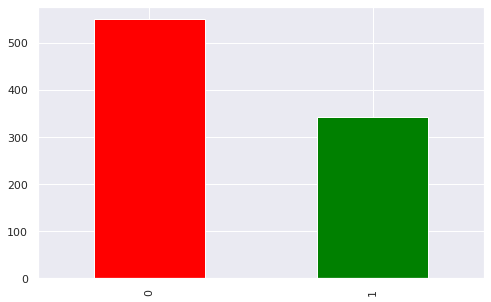

In [62]:
train["Survived"].value_counts().plot(kind='bar',stacked=True, figsize=(8,5),color=['red','green'])

In [63]:
def bar_charts(col):
    survived = train[train['Survived']==1][col].value_counts()
    dead = train[train['Survived']==0][col].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', figsize=(10,6),color=["orange","crimson","royalblue"])
    print("survived",train[train["Survived"]==1][col].value_counts(),sep='\n'),
    print("dead",train[train["Survived"]==0][col].value_counts(),sep='\n')

survived
1    136
3    119
2     87
Name: Pclass, dtype: int64
dead
3    372
2     97
1     80
Name: Pclass, dtype: int64


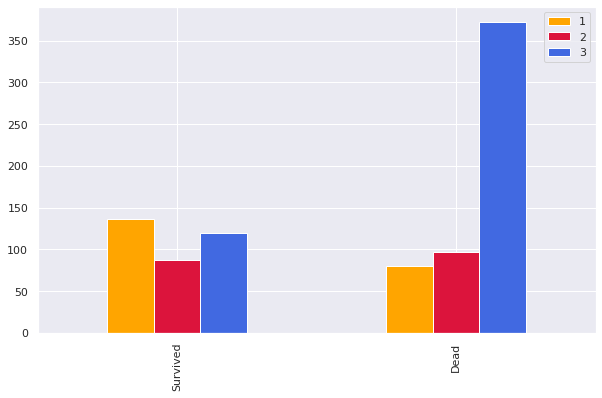

In [64]:
bar_charts("Pclass")

so,people from **1st class** more likely survivied than 2nd and 3rd classes.Also
we can see that **3rd class** more likely dead than other classes.


survived
female    233
male      109
Name: Sex, dtype: int64
dead
male      468
female     81
Name: Sex, dtype: int64


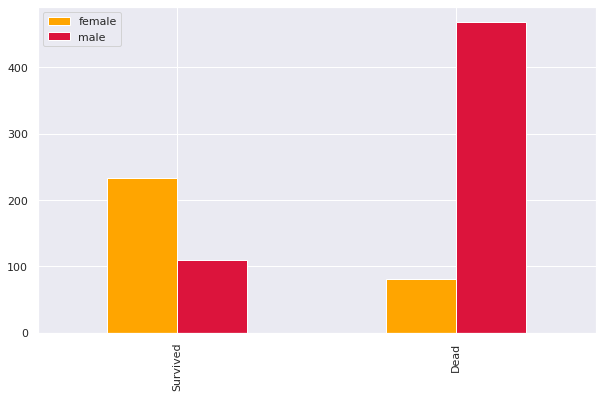

In [65]:
bar_charts("Sex")

This confirms that Female are more likely to be survived than male

survived
S    217
C     93
Q     30
Name: Embarked, dtype: int64
dead
S    427
C     75
Q     47
Name: Embarked, dtype: int64


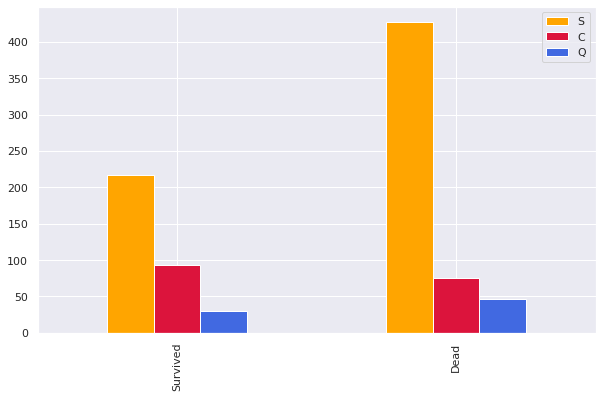

In [66]:
bar_charts("Embarked")

survived
0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
dead
0    398
1     97
2     15
4     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


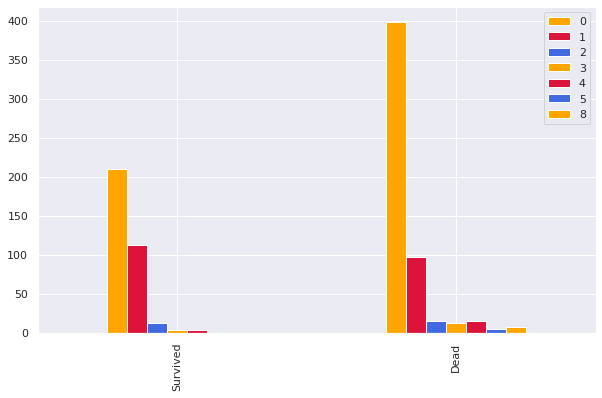

In [67]:
bar_charts("SibSp")

This confirms that a person onboard with siblings survived where as a person without any siblings or spouse are most likely dead

survived
0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
dead
0    445
1     53
2     40
4      4
5      4
3      2
6      1
Name: Parch, dtype: int64


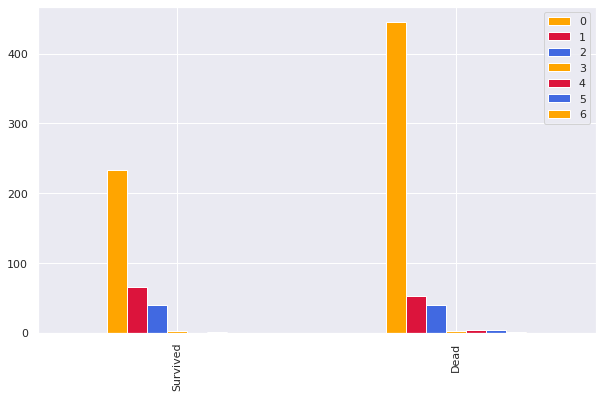

In [68]:
bar_charts("Parch")

#  Feature engineering

Feature engineering is used to extract features from raw data along with the use of domain knowledge.
It is a process that takes raw data and transforms it into features that can be used to create a predictive model.Here we are going to tranform categorical features to numerical features and to fill the missing values.
Feature engineering helps us to improve the performance of the machine learning model.

**How Titanic sank???**

It starts to sank from where 3rd class is located so column Pclass is  arbitrarily important.

In [70]:
#changing sex column to numeric
train["Sex"].replace(to_replace =["male"],
                 value =0,inplace=True)
train["Sex"].replace(to_replace =["female"],
                 value =1,inplace=True)

In [71]:
test["Sex"].replace(to_replace =["male"],
                 value =0,inplace=True)
test["Sex"].replace(to_replace =["female"],
                 value =1,inplace=True)

In [72]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

filling the missing embark with"S"embark.

In [73]:
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)
train["Embarked"].isnull().sum()
embark={"S":0, "C":1, "Q":2}
train["Embarked"].replace(embark,inplace=True)

In [74]:
test['Embarked'].fillna(test['Embarked'].mode()[0],inplace=True)
test["Embarked"].isnull().sum()
embark={"S":0, "C":1, "Q":2}
test["Embarked"].replace(embark,inplace=True)

In [75]:
train["identity"]=train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train["identity"].value_counts()


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Lady          1
Sir           1
Ms            1
Don           1
Jonkheer      1
Mme           1
Countess      1
Capt          1
Name: identity, dtype: int64

In [76]:
#trurning categorical to numeric
train["identity"].replace(to_replace =["Ms","Miss"],
                 value =0,inplace=True)
train["identity"].replace(to_replace =["Mrs","Lady"],
                 value =1,inplace=True)
train["identity"].replace(to_replace =["Mr","Sir"],value =2,inplace=True)
train["identity"].replace(to_replace ="Master",
                 value =3,inplace=True)
train["identity"].replace(to_replace =["Dr","Rev","Major","Mlle","Col","Mme","Capt","Don","Jonkheer","Countess","Dona"],
                 value =4,inplace=True)
train["identity"].isnull().sum()

0

In [77]:
test["identity"]=test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test["identity"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: identity, dtype: int64

In [78]:
test["identity"].replace(to_replace =["Ms","Miss"],
                 value =0,inplace=True)
test["identity"].replace(to_replace =["Mrs","Lady"],
                 value =1,inplace=True)
test["identity"].replace(to_replace =["Mr","Sir"],value =2,inplace=True)
test["identity"].replace(to_replace ="Master",
                 value =3,inplace=True)
test["identity"].replace(to_replace =["Dr","Rev","Major","Mlle","Col","Mme","Capt","Don","Jonkheer","Countess","Dona"],
                 value =4,inplace=True)
test["identity"].isnull().sum()

0

In [79]:
for i in range(5):
    print(train[train["identity"]==i]["Age"].median())
train["Age"].fillna(train.groupby("identity")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("identity")["Age"].transform("median"), inplace=True)


21.0
35.0
30.0
3.5
44.0


In [80]:
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [81]:
train.drop(['Name'],axis=1,inplace=True)
train.drop(['Cabin'],axis=1,inplace=True)
train.drop(['Ticket'],axis=1,inplace=True)

In [82]:
test.drop(['Name'],axis=1,inplace=True)
test.drop(['Cabin'],axis=1,inplace=True)
test.drop(['Ticket'],axis=1,inplace=True)

In [83]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,identity
0,1,0,3,0,22.0,1,0,7.2500,0,2
1,2,1,1,1,38.0,1,0,71.2833,1,1
2,3,1,3,1,26.0,0,0,7.9250,0,0
3,4,1,1,1,35.0,1,0,53.1000,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,2


In [84]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,identity
0,892,3,0,34.5,0,0,7.8292,2,2
1,893,3,1,47.0,1,0,7.0000,0,1
2,894,2,0,62.0,0,0,9.6875,2,2
3,895,3,0,27.0,0,0,8.6625,0,2
4,896,3,1,22.0,1,1,12.2875,0,1


# Model and Prediction

In [85]:
train = train.drop(['PassengerId'], axis=1)
x=train.drop(["Survived"],axis=1)
y=train["Survived"]

In [86]:
print(x.shape,y.shape)

(891, 8) (891,)


In [87]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
k_fold = KFold(n_splits=10, shuffle=True, random_state=1)

## Naive Bayes

In [88]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
nb=round(np.mean(score)*100, 2)
print(nb)


[0.77777778 0.80555556 0.8028169  0.77464789 0.78873239 0.73239437
 0.77464789 0.78873239 0.81690141 0.83098592]
78.93
